In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# reading the data
bikes_hour_df_raws = pd.read_csv('bike_sharing_hour.csv')

In [3]:
# First Rows of bike rental hour dataset
bikes_hour_df_raws.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# removing useless feature
bikes_hour_df = bikes_hour_df_raws.drop(['casual' , 'registered'], axis=1)

In [5]:
#lets get information about features
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [6]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

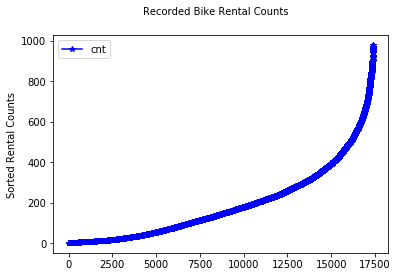

In [7]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 10)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 10)


Text(0, 0.5, 'Count of all Biks Rented')

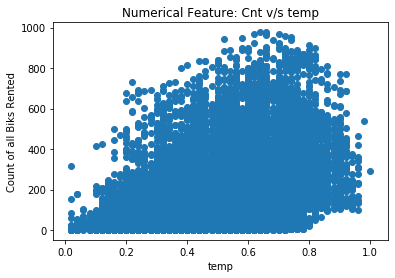

In [8]:
plt.scatter(bikes_hour_df['temp'], bikes_hour_df['cnt'])
plt.title('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

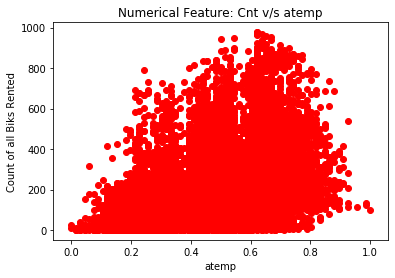

In [9]:
plt.scatter(bikes_hour_df['atemp'], bikes_hour_df['cnt'],color='red')
plt.title('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

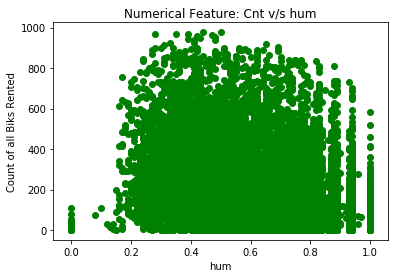

In [10]:
plt.scatter(bikes_hour_df['hum'], bikes_hour_df['cnt'],color="green")
plt.title('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

Text(0, 0.5, 'Count of all Biks Rented')

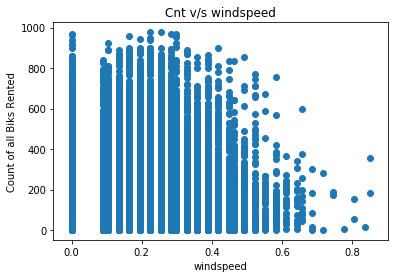

In [11]:
plt.scatter(bikes_hour_df['windspeed'], bikes_hour_df['cnt'])
plt.title('Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

In [12]:
bikes_hour_df.drop(['instant','dteday','atemp'],axis=1,inplace=True)

In [13]:
bikes_hour_df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


In [14]:
x=bikes_hour_df.iloc[:,0:11].values
x

array([[ 1.    ,  0.    ,  1.    , ...,  0.24  ,  0.81  ,  0.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.22  ,  0.8   ,  0.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.22  ,  0.8   ,  0.    ],
       ...,
       [ 1.    ,  1.    , 12.    , ...,  0.26  ,  0.6   ,  0.1642],
       [ 1.    ,  1.    , 12.    , ...,  0.26  ,  0.56  ,  0.1343],
       [ 1.    ,  1.    , 12.    , ...,  0.26  ,  0.65  ,  0.1343]])

In [15]:
y=bikes_hour_df.iloc[:,-1].values
y

array([16, 40, 32, ..., 90, 61, 49], dtype=int64)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
lr =DecisionTreeRegressor(random_state=0)

#training model in training set
lr.fit(X_train, y_train)

# making predection using the test set
y_pred = lr.predict(X_test)
y_pred


array([  4.,   3., 410., ..., 546., 276., 168.])

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8842566900917996